In [2]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
% matplotlib inline

importing the "best5" features that were extracted with matlab on the test- and validation set as well as the class labels. 

In [3]:
X_train = np.genfromtxt('q2_train_features.csv', delimiter=',') 
y_train = np.genfromtxt('q2_train_labels.csv', delimiter=',').astype(int)
X_val = np.genfromtxt('q2_val_features.csv', delimiter=',') 
y_val = np.genfromtxt('q2_val_labels.csv', delimiter=',').astype(int)

In [4]:
y_train = np.argmax(y_train, axis=1)  #convert from one-hot-encoded back to single value
y_val=np.argmax(y_val, axis=1)

In [5]:
print(X_train.shape)      # check the shapes match
print(type(X_train[0]))
print(y_train.shape)
print(type(y_train[0]))

(4164, 74)
<class 'numpy.ndarray'>
(4164,)
<class 'numpy.int64'>


In [6]:
print(sum(np.isnan(X_train).astype(int)))   #check for nans
print(sum(np.isnan(X_val).astype(int)))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 35 35 35 35 35  0  0  0  0  0  0  0  0  0  0  0  2  0
  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
imputer = sklearn.preprocessing.Imputer()   #impute missing values, replace by mean
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_val = imputer.transform(X_val)

In [8]:
print(sum(np.isnan(X_train).astype(int)))  #check if removing nans was successful
print(sum(np.isnan(X_val).astype(int)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
scaler = sklearn.preprocessing.StandardScaler() #standardize features by removing the mean and scaling to unit variance
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

t-SNE

In [10]:
tsne = TSNE(n_components=2, verbose=1)  #create Tsne plot to see how well the handcrafted features separate
projected = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4164 samples in 0.013s...
[t-SNE] Computed neighbors for 4164 samples in 3.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4164
[t-SNE] Computed conditional probabilities for sample 2000 / 4164
[t-SNE] Computed conditional probabilities for sample 3000 / 4164
[t-SNE] Computed conditional probabilities for sample 4000 / 4164
[t-SNE] Computed conditional probabilities for sample 4164 / 4164
[t-SNE] Mean sigma: 1.743931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.006172
[t-SNE] Error after 1000 iterations: 1.845020


[0 1 2 3 4 5 6 7]


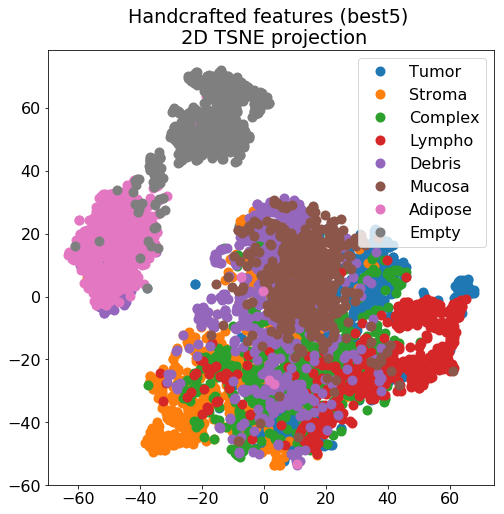

In [11]:
cl = ["Tumor","Stroma","Complex","Lympho","Debris","Mucosa","Adipose","Empty"]

import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 8))
labels = np.unique(y_train)
print(labels)
for label in labels:
    mask = y_train==label
    plt.plot(projected[mask,0],projected[mask,1],'.',label=cl[int(label)], mew=5, ms=10)
plt.legend()
plt.title("Handcrafted features (best5) \n 2D TSNE projection")


# plt.scatter(projected[:,0],projected[:,1],c=y_train)
# plt.colorbar()

Linear SVM

In [12]:
svm_linear = SVC(kernel='linear') #define
svm_linear.fit(X_train, y_train)  #fit
svm_linear.score(X_val, y_val)    #score

0.8767942583732058

Radial basis function SVM

In [13]:
svm_rbf = SVC(kernel='rbf')      #define
svm_rbf.fit(X_train, y_train)    #fit
svm_rbf.score(X_val, y_val)      #score

0.8277511961722488

Random Forest

In [14]:
forest = RandomForestClassifier(n_estimators=500)  #define
forest.fit(X_train, y_train)                       #fit
forest.score(X_val, y_val)                         #score

0.8755980861244019

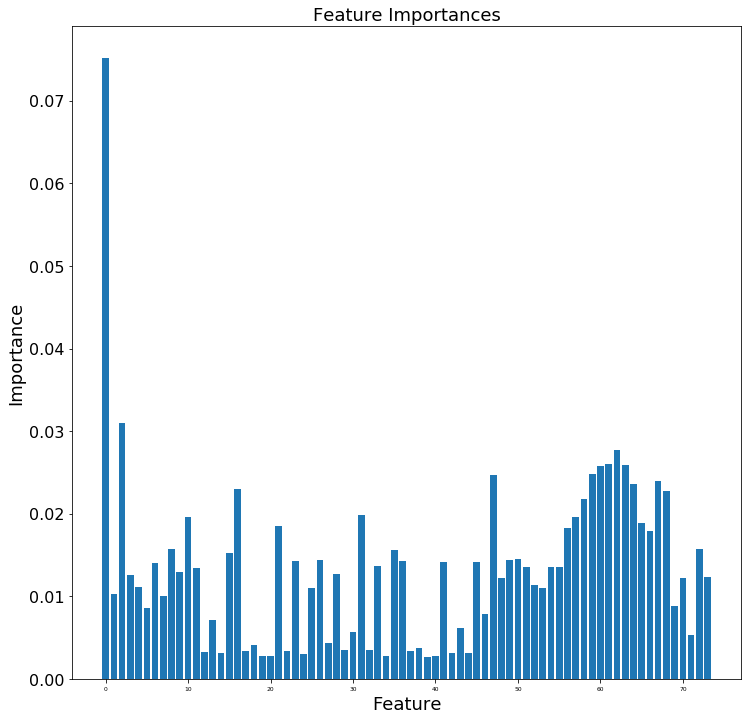

In [120]:
importances = forest.feature_importances_         #compute forest importances to evaluate which features perform best
n = len(importances)
fig ,ax = plt.subplots(figsize=(12, 12))
ax.bar(range(n),importances)
label_size = 6
plt.rcParams['xtick.labelsize'] = label_size; 
plt.title('Feature Importances',fontsize=18)
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Importance',fontsize=18)

### Predict features for question 3

In [51]:
#level1
X_val_l1 = np.genfromtxt('features_level1.csv', delimiter=',')
X_val_l1=scaler.transform(X_val_l1)
y_val_l1 = svm_linear.predict(X_val_l1)
y_val_l1=y_val_l1+np.ones(len(y_val_l1))

In [48]:
print(max(y_val_l1))

7.0


In [59]:
np.savetxt('classes_level1.csv', y_val_l1, delimiter=',')

In [60]:
#level3

X_val_l3 = np.genfromtxt('features_level3.csv', delimiter=',')
X_val_l3=scaler.transform(X_val_l3)
y_val_l3 = svm_linear.predict(X_val_l3)
y_val_l3=y_val_l3+np.ones(len(y_val_l3))
np.savetxt('classes_level3.csv', y_val_l3, delimiter=',')

In [58]:
print(max(y_val_l3))

8.0
